# Speech-to-text Module 
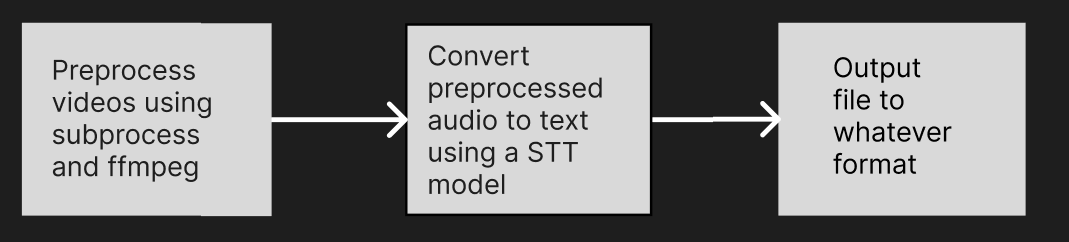

1. Install and Import Dependencies

In [1]:
import subprocess
import io #to convert audio files to binary streams
from google.oauth2 import service_account
from google.cloud import speech

2. Extract Audio

In [ ]:
command = 'ffmpeg -i bishop1.webm -ab 160k -ar 44100 -vn audio3.wav'
subprocess.call(command, shell=True)

3. Setup STT Service

In [2]:
client_file = 'sa_speechdemo.json'
credentials = service_account.Credentials.from_service_account_file(client_file)
client = speech.SpeechClient(credentials = credentials)

4. Open Audio Source and Convert

In [3]:
# load the audio file
audio_file = 'audio3.wav'
with io.open(audio_file, 'rb') as f:
    content = f.read()
    audio = speech.RecognitionAudio(content=content)

5. Process Results and Output to Text

In [4]:
config = speech.RecognitionConfig(
    encoding = speech.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=44100,
    language_code='en-US',
    audio_channel_count = 2,
)

In [5]:
# Perform speech-to-text operation
response = client.recognize(config=config, audio=audio)
for result in response.results:
    print(result.alternatives[0].transcript)

following is leading leads the way to the realm of flourishing the clarity of divine erection is an answer to dry seasons today if you just got your leg and move above as a shape without a shape but following is leading terminates the harassment of dry season to avoid Miss investment of time energy and resource is wisdom to ask the 1 who knows whether you taken the right step taking your own step it may look so right it doesn't make it right but somehow so proud that even when they know they miss it I would like to hear a message they keep pushing in the wrong direction all through like but there's a way that right on the end of the ways of death you know what it means to swim against the tide after a while your yourself is over you just do what


In [6]:
# Store transcripts in an array
text = [res.alternatives[0].transcript.rstrip() + ".\n" for res in response.results]
text

["following is leading leads the way to the realm of flourishing the clarity of divine erection is an answer to dry seasons today if you just got your leg and move above as a shape without a shape but following is leading terminates the harassment of dry season to avoid Miss investment of time energy and resource is wisdom to ask the 1 who knows whether you taken the right step taking your own step it may look so right it doesn't make it right but somehow so proud that even when they know they miss it I would like to hear a message they keep pushing in the wrong direction all through like but there's a way that right on the end of the ways of death you know what it means to swim against the tide after a while your yourself is over you just do what.\n"]

In [7]:
# Strip out white space, concatenate and save as a text file
text = [para[0].title() + para[1:] for para in text] #take the first letter within each sentence and adding a title case then join
transcript = ''.join(text)
with open('output.txt', 'w') as out:
        out.writelines(transcript)

# Using Microphone

In [13]:
import time
import speech_recognition as sr
import os

In [18]:
recognizer = sr.Recognizer()

# List available microphones 
print("Available microphones:")
print(sr.Microphone.list_microphone_names())

try:
    with sr.Microphone() as source:
        print("Adjusting noise. Please wait...")
        recognizer.adjust_for_ambient_noise(source, duration=1)
        print("You can start speaking now...")

        while True:
            print("\nListening...")
            # Capture audio in chunks
            audio = recognizer.listen(source, phrase_time_limit=5)
            try:
                # Recognize speech
                text = recognizer.recognize_google(audio, language="en-US")
                words = text.split()  # Split into words
                for word in words:
                    print(word, end=" ", flush=True)  # Print words as they are recognized
                    time.sleep(0.5)
            except sr.UnknownValueError:
                pass  # Ignore unrecognized audio
            except sr.RequestError as e:
                print(f"\nCould not request results; {e}")
                break

except KeyboardInterrupt:
    print("\nProgram terminated.")

Available microphones:
['Microsoft Sound Mapper - Input', 'Microphone Array (Realtek(R) Au', 'Jack Mic (Realtek(R) Audio)', 'Microsoft Sound Mapper - Output', 'Headphones (Realtek(R) Audio)', 'Speakers (Realtek(R) Audio)', 'Primary Sound Capture Driver', 'Microphone Array (Realtek(R) Audio)', 'Jack Mic (Realtek(R) Audio)', 'Primary Sound Driver', 'Headphones (Realtek(R) Audio)', 'Speakers (Realtek(R) Audio)', 'Headphones (Realtek(R) Audio)', 'Speakers (Realtek(R) Audio)', 'Jack Mic (Realtek(R) Audio)', 'Microphone Array (Realtek(R) Audio)', 'Microphone Array 1 (Realtek HD Audio Mic input with SST)', 'Microphone Array 2 (Realtek HD Audio Mic input with SST)', 'Microphone Array 3 (Realtek HD Audio Mic input with SST)', 'FrontMic (Realtek HD Audio Front Mic input)', 'Headphones 1 (Realtek HD Audio 2nd output with SST)', 'Headphones 2 (Realtek HD Audio 2nd output with SST)', 'PC Speaker (Realtek HD Audio 2nd output with SST)', 'Stereo Mix (Realtek HD Audio Stereo input)', 'Speakers 1 (Real